In [1]:
from matplotlib.pyplot import *

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, Aer, transpile, assemble, execute

# Loading your IBM Quantum account(s)
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')

from qiskit.test.mock import FakeMelbourne
device = FakeMelbourne()


<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [2]:
from numpy import linspace
P=linspace(0,1,21)
fid1=[]
fid2=[]

In [3]:
for p in P:
    f=0
    for q1 in range(2):
        for q2 in range(2):
            a=["I","I"]
            qc=QuantumCircuit(2,2)
            qc.h(0)
            qc.cx(0,1)
            qc.barrier()
            if q1:
                a[0]="X"
                qc.x(0)
            if q2:
                a[1]="X"
                qc.x(1)
            qc.barrier()
            qc.cx(0,1)
            qc.h(0)
            qc.barrier()
            qc.measure([0,1],[0,1])
            res= execute(qc, backend=device, shots=1024).result().get_counts()
             
            try:
                q= res['00']/1024
            except:
                q=0
            k=0
            for b in a:
                if b== "X":
                    k=k+1
            f=f+q*(p**k)*((1-p)**(2-k))
    fid1.append(f)
            

In [4]:
f1= (1-P)**2+P**2

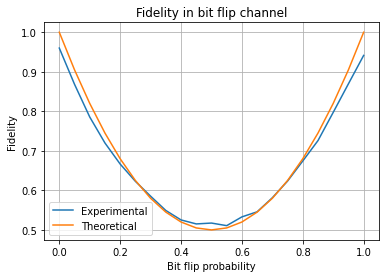

In [5]:
plot(P,fid1, label= "Experimental")
plot(P,f1, label= "Theoretical")
title("Fidelity in bit flip channel")
xlabel("Bit flip probability")
ylabel("Fidelity")
grid()
legend()

In [6]:
f2= (1-P)**6+P**6+6*P*((1-P)**5)+9*(P**2)*((1-P)**4)+9*(P**4)*((1-P)**2)+6*(P**5)*(1-P)

In [7]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import pauli_error, depolarizing_error

def get_noise(p):

    error_meas = pauli_error([('X',p), ('I', 1 - p)])

    noise_model = NoiseModel()
    noise_model.add_all_qubit_quantum_error(error_meas, "measure") # measurement error is applied to measurements
        
    return noise_model

In [9]:
from qiskit.ignis.mitigation.measurement import (complete_meas_cal,
                                                 CompleteMeasFitter, 
                                                 MeasurementFilter)

aer_sim = Aer.get_backend('aer_simulator')

In [ ]:
fid2= []
fid2.append([1,2])
fid2= []
results=[]

for p in P:
    f=0
    for q1 in range(2):
        for q2 in range(2):
            for q3 in range(2):
                for q4 in range(2):
                    for q5 in range(2):
                        for q6 in range(2):
                            #a=["I","I","I","I","I","I"]
                            cr= ClassicalRegister(2,"bell_basis_measurement")
                            alice_qubit= QuantumRegister(1, 'alice__qubit')
                            bob_qubit= QuantumRegister(1, 'bob__qubit')
                            lq1= QuantumRegister(2, 'logical_qubit_alice')
                            lq2= QuantumRegister(2,'logical_qubit_bob')
                            
                            repetation_code_qc= QuantumCircuit(alice_qubit,lq1,bob_qubit,lq2,cr)
                            
                            repetation_code_qc.h(alice_qubit[0])
                            repetation_code_qc.cx(alice_qubit[0],bob_qubit[0])
                            repetation_code_qc.barrier()
                            repetation_code_qc.cx(alice_qubit[0],lq1[0])
                            repetation_code_qc.cx(alice_qubit[0],lq1[1])
                            repetation_code_qc.cx(bob_qubit[0],lq2[0])
                            repetation_code_qc.cx(bob_qubit[0],lq2[1])
                            repetation_code_qc.barrier()
                            
                            #if q1:
                                #repetation_code_qc.x(alice_qubit[0])
                                #a[0]="X"
                            #if q2:
                                #repetation_code_qc.x(lq1[0])
                                #a[1]="X"
                            #if q3:
                                #repetation_code_qc.x(lq1[1])
                                #a[2]="X"
                            #if q4:
                                #repetation_code_qc.x(bob_qubit[0])
                                #a[3]="X"
                            #if q5:
                                #repetation_code_qc.x(lq2[0])
                                #a[4]="X"
                            #if q6:
                                #repetation_code_qc.x(lq2[1])
                                #a[5]="X"
                                
                            #repetation_code_qc.barrier()
                            
                            repetation_code_qc.cx(alice_qubit[0], lq1[0])
                            repetation_code_qc.cx(alice_qubit[0], lq1[1])
                            repetation_code_qc.ccx(lq1[0], lq1[1], alice_qubit[0])
                            
                            repetation_code_qc.cx(bob_qubit[0], lq2[0])
                            repetation_code_qc.cx(bob_qubit[0], lq2[1])
                            repetation_code_qc.ccx(lq2[0], lq2[1], bob_qubit[0])
                            
                            repetation_code_qc.barrier()
                            repetation_code_qc.cx(alice_qubit[0],bob_qubit[0])
                            repetation_code_qc.h(alice_qubit[0])
                            repetation_code_qc.barrier()
                            repetation_code_qc.measure([alice_qubit[0], bob_qubit[0]],cr)
                            
                            result= execute(repetation_code_qc, backend=device, shots=1024).result()
                            # Error Mitigation 
                            meas_calibs, state_labels = complete_meas_cal(qr=repetation_code_qc.qregs[0], circlabel='mcal')
                            t_qc = transpile(meas_calibs, aer_sim)
                            qobj = assemble(t_qc, shots=10000)
                            cal_results = aer_sim.run(qobj, shots=10000).result()
                            meas_fitter = CompleteMeasFitter(cal_results, state_labels, circlabel='mcal')
                            mitigated_result = meas_filter.apply(result)
                            mitigated_counts = mitigated_result.get_counts(circuit)

                            #results.append(result)
                            try:
                                q= mitigated_counts['00']/1024
                            except:
                                q=0
                            k=0
                            for b in a:
                                if b== "X":
                                    k=k+1
                            f=f+q*(p**k)*((1-p)**(6-k))
    fid2.append(f)
                            

In [ ]:
plot(P, fid2)

In [ ]:
plot(P,fid2, label= "Experimental")
plot(P,f2, label= "Theoretical")
title("Fidelity after 3 qubit repetation code under bit flip channel")
xlabel("Bit flip probability")
ylabel("Fidelity")
grid()
legend()

In [ ]:
plot(P,fid1,label="without error correction")
plot(P,fid2, label="Repetation Code")
legend()
title("Experimental result of 3-qubit repetation code")
xlabel("Bit flip probability")
ylabel("Fidelity")
grid()